In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift,estimate_bandwidth
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

C:\Users\Hariharan V\AppData\Local\Temp\ipykernel_9412\3076717378.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x["num_reactions"], x["num_comments"], cmap="rainbow")


Text(0, 0.5, 'comments')

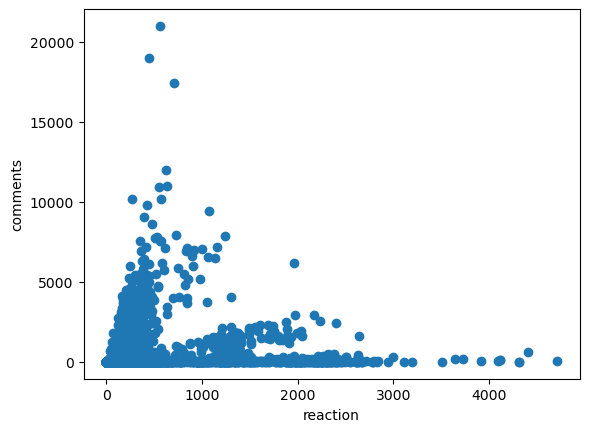

In [23]:
data = pd.read_csv('Live.csv')

x = data.loc[:,["num_reactions","num_comments"]]

plt.scatter(x["num_reactions"], x["num_comments"], cmap="rainbow")
plt.xlabel("reaction")
plt.ylabel("comments")

In [27]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x = ss.fit_transform(x)

x[:,0]


array([ 0.64610394, -0.17319166, -0.00673846, ..., -0.49312768,
        0.26131603, -0.46070173])

In [33]:
# Estimating the bandwith (or the radius which needs to be taken as part of step 2)
bandwidth = estimate_bandwidth(x,quantile=1)
meanshift = MeanShift(bandwidth=bandwidth)
y_pred = meanshift.fit_predict(x)
labels = meanshift.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

y_pred,labels_unique

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64), array([0], dtype=int64))

Text(0, 0.5, 'comments')

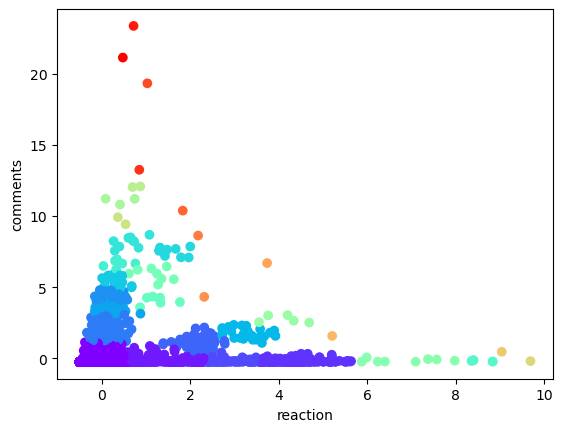

In [31]:
plt.scatter(x[:,0], x[:, 1], c=y_pred, cmap="rainbow")
plt.xlabel("reaction")
plt.ylabel("comments")

In [32]:
from sklearn.metrics import silhouette_score as ss

ss(x,y_pred)

0.7302686152535426